In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\P1-P6 Customer Seegmentation

25.07.2022  15:20    <DIR>          .
25.07.2022  15:20    <DIR>          ..
25.07.2022  14:35    <DIR>          .ipynb_checkpoints
25.07.2022  15:20           509.642 CUSTOMER SEGMENTAT˜ON-Clustering.ipynb
25.07.2022  12:20         7.037.043 PBL5recommendationdata.csv
               2 File(s)      7.546.685 bytes
               3 Dir(s)  84.111.912.960 bytes free


In [3]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding='latin-1')

In [4]:
# EDA

In [5]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [6]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [8]:
df.sample(20)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2030,1698,Alphonsine,Conolly,NaN,1444840576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1456953267,0.0,7047,1698,Alphonsine,Conolly,NaN,7047,NaN,NaN,NaN,USD,NaN,117.17,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.17,NaN,manual,-1|Free Shipping,NaN,NaN,NaN,1ZF11Y490393654247,3.0,1.444841e+09,Berry,authorize.net,NaN,...,NaN,sunshade; sun shade; scooter shade; scooter su...,NaN,NaN,Power-Scooter-Sun-Shade,NaN,EA,NaN,NaN,NaN,38.5,24.0,64.5,No,Not Made With Natura,8.223830e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Limited Lifetime,0.0,NaN,Universal,No Assembly Required,Installation Required,41.00,26.00,6.00,28.00,Ships Same Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PM6,0.0,NaN
4178,3720,Robyn,Burton,NaN,1463332326,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463332326,0.0,17376,3720,Robyn,Burton,NaN,17376,NaN,NaN,NaN,USD,NaN,60.40,0.0,9.95,32.0,6.04,NaN,NaN,NaN,NaN,NaN,NaN,64.31,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.463332e+09,NaN,paypal,PayPal,...,NaN,mattress overlays; air mattress overlay; air m...,NaN,NaN,Med-Aire-Alternating-Pressure-Pump-and-Pad-Sys...,NaN,EA,NaN,NaN,NaN,78.0,36.0,2.5,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/14...,NaN,E0181,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1 Year Limited on Pump; 90 Day Limited on Pad,0.0,NaN,Universal,No Assembly Required,Tool Free Installation,11.50,8.63,7.50,8.98,Ships Same Day,NaN,5.0,Standard,NaN,NaN,NaN,NaN,NaN,PP21,0.0,NaN
3751,3307,Aaron,Matlock,NaN,1461214063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461214063,0.0,15920,3307,Aaron,Matlock,NaN,15920,NaN,NaN,NaN,USD,NaN,44.85,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.80,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461214e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Endotracheal-Tube-Introducer-Bougie-Pediatric-...,NaN,NaN,NaN,10/PKG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pediatric 10FR,NaN,NaN,NaN,NaN,NaN,DY-88,NaN,NaN
753,601,Diane,Wilde,NaN,1421183744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764221,0.0,3116,601,Diane,Wilde,NaN,3

In [9]:
df.duplicated().sum()# I checked if it's the same data

0

In [10]:
df=df.dropna(axis=1,how='any')#deletes empty data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [12]:
df=df.drop(['Order_Items.parent','Orders.order_number','Orders.lname','Orders.fname','Orders.customer_id'],axis=1)

In [13]:
df.head(2)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.product_name,Order_Items.qty,Order_Items.price
0,797,Christy,Dill,1426018724,1437764306,3758,USD,57.2,64.29,1,1426019099,5284,"Basic Rollators, Green",1,57.2
1,3,John,Smith,1386089139,1437764354,23,USD,20.0,29.99,1,1386090455,31,"Urinary Drain Bags,0.000",4,5.0


In [14]:
df=df[['Customers.id','Order_Items.qty','Orders.total']]#costumer ,order count,total expenditure

In [15]:
df.head(2)

,Customers.id,Order_Items.qty,Orders.total
0,797,1,64.29
1,3,4,29.99


In [16]:
df=df.groupby('Customers.id',as_index=False).sum()

In [17]:
df.head(2)

,Customers.id,Order_Items.qty,Orders.total
0,3,5,108.72
1,4,1,29.55


In [18]:
df2=df['Orders.total'].sort_values(ascending=False)

In [19]:
df2.head(20)

811     15228.95
1055    10007.48
1610     9502.36
1276     8530.28
1363     8452.78
2200     8119.38
1115     7330.23
2052     6053.76
772      5713.08
2053     5705.88
1073     5428.15
350      5093.30
2445     4987.50
873      4859.05
319      4419.01
417      4383.37
2583     4328.60
2112     3973.14
2764     3861.80
90       3680.00
Name: Orders.total, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customers.id     3054 non-null   int64  
 1   Order_Items.qty  3054 non-null   int64  
 2   Orders.total     3054 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 71.7 KB


In [21]:
df.quantile(.97).astype('int')

Customers.id       3626
Order_Items.qty       8
Orders.total        794
Name: 0.97, dtype: int32

In [22]:
outliers=df.quantile(.97)
df=df[(df['Order_Items.qty']<outliers['Order_Items.qty'])]
df=df[(df['Orders.total']<outliers['Orders.total'])]

In [23]:
df=df.drop('Customers.id',axis=1)
df

,Order_Items.qty,Orders.total
0,5,108.72
1,1,29.55
2,3,124.99
3,1,49.14
4,1,69.70
...,...,...
3048,1,27.47
3049,1,16.06
3050,1,39.99
3052,1,129.99


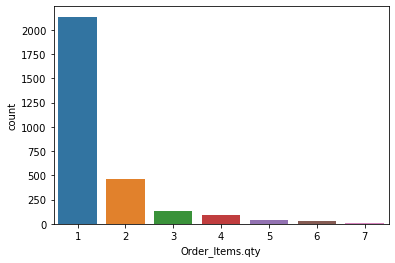

In [24]:
sns.countplot(df['Order_Items.qty']);

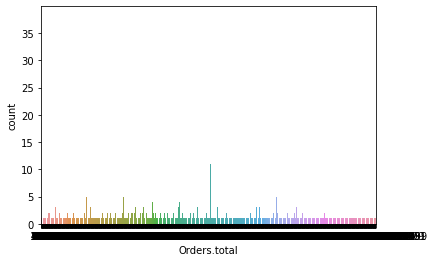

In [25]:
sns.countplot(df['Orders.total']);

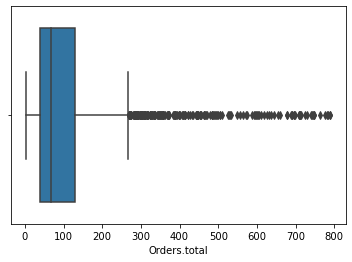

In [26]:
sns.boxplot(df['Orders.total']);

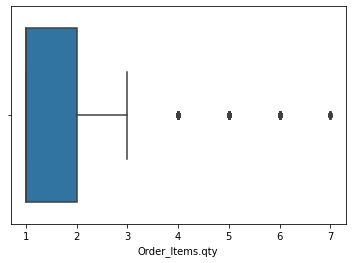

In [27]:
sns.boxplot(df['Order_Items.qty']);

In [28]:
model=KMeans(n_clusters=5)

In [29]:
model=model.fit(df)

In [30]:
pred=model.predict(df)

In [31]:
pred

array([0, 3, 0, ..., 3, 0, 3])

In [32]:
df.head()

,Order_Items.qty,Orders.total
0,5,108.72
1,1,29.55
2,3,124.99
3,1,49.14
4,1,69.70


In [33]:
silhouette_score(df,pred)

0.6397659701517604

In [34]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(df)
        pred=model.predict(df)
        score=silhouette_score(df,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [35]:
clust=df.assign(Cluıster=model.labels_)
model.cluster_centers_.astype('int')#merkeszi belirliyor
model.labels_

array([0, 3, 0, ..., 3, 0, 3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


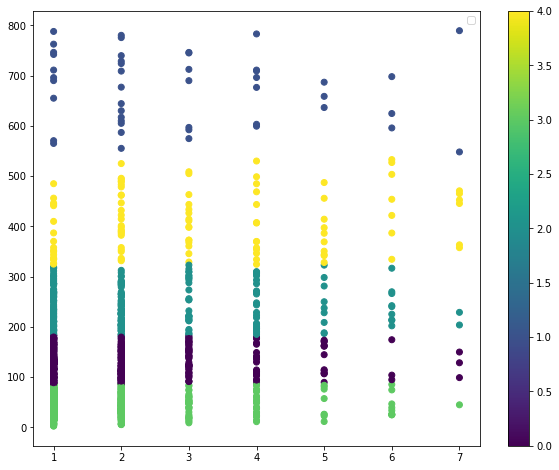

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['Order_Items.qty'],y=df['Orders.total'],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [37]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred=model.fit_predict(df)
            sum_of_squared_distances.append(model.inertia_)
            score=silhouette_score(df,pred)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(12)

Number of cluster 2, silhouette 0.7693624460756409
Number of cluster 3, silhouette 0.6456857038542114
Number of cluster 4, silhouette 0.6497466947398826
Number of cluster 5, silhouette 0.6408978493590577
Number of cluster 6, silhouette 0.573139285597224
Number of cluster 7, silhouette 0.5767448378134193
Number of cluster 8, silhouette 0.5764434723257651
Number of cluster 9, silhouette 0.5747252608313841
Number of cluster 10, silhouette 0.5527629434028299
Number of cluster 11, silhouette 0.5431440628100669
Number of cluster 12, silhouette 0.5491178412033197


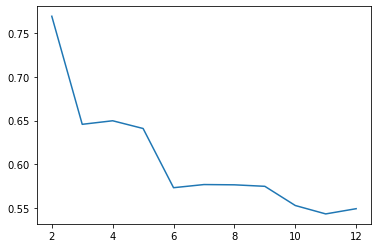

In [38]:
plt.plot(allclusters,allscore)

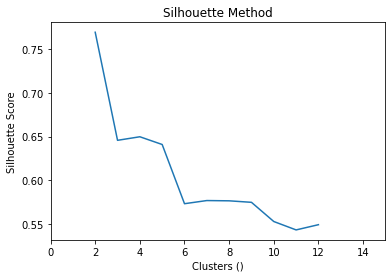

In [39]:
#Ploting the silhoutte method
plt.plot(allclusters,allscore)
plt.xlabel('Clusters ()')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

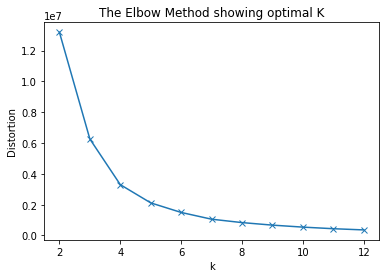

In [40]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [77]:
######################################################################################################################################

In [41]:
a=pd.read_csv('PBL5recommendationdata.csv',encoding='latin1')


In [42]:
a.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [43]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [44]:
a.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [45]:
for col in a.columns:
    if a[col].notnull().sum()<1000:
        a.drop(col, inplace=True, axis=1)
for co in a.select_dtypes(include='object').columns:
    a[co].fillna(a[co].mode()[0], inplace=True)
for co in a.select_dtypes(include=['float64']).columns:
    a[co].fillna(a[co].mean(), inplace=True)

a[a.select_dtypes(['object']).columns]=a.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

In [46]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 97 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customers.id                   4194 non-null   int64   
 1   Customers.fname                4194 non-null   category
 2   Customers.lname                4194 non-null   category
 3   Customers.create_date          4194 non-null   int64   
 4   Customers.mailing              4194 non-null   float64 
 5   Customers.last_modified        4194 non-null   int64   
 6   Customers.customer_type        4194 non-null   float64 
 7   Orders.id                      4194 non-null   int64   
 8   Orders.customer_id             4194 non-null   int64   
 9   Orders.fname                   4194 non-null   category
 10  Orders.lname                   4194 non-null   category
 11  Orders.order_number            4194 non-null   category
 12  Orders.currency                419

In [47]:
a1 = a.filter(regex='Customers.')

In [48]:
a2 = a.filter(regex='Products.')

In [49]:
a3 = a.filter(regex='Orders.')

In [50]:
a.shape

(4194, 97)

In [51]:
a1.shape,a2.shape,a3.shape

((4194, 7), (4194, 56), (4194, 26))

In [52]:
a3.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.notes,Orders.customer_type
0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,abe,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,Insured By Eye4Fraud,0.0
1,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,abe,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,Phone Order,0.0
2,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,manual,0|Standard Shipping,6.87398E+14,3.0,1.449604e+09,genlee166,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,Test,0.0
3,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,abe,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,Phone Order,0.0
4,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.95,46.00,fedex,11|Ground,6.87398E+14,3.0,1.386862e+09,abe,authorize.net,46.00,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,Phone Order,0.0


In [53]:
a3=a3.drop(['Orders.order_number','Orders.lname','Orders.fname','Orders.customer_id','Orders.notes'],axis=1)

In [54]:
a2.head()

,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_color,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_keywords,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.latex,Products.upc,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,Green,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...","transport wheelchair, transport wheelchairs, l...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,Yes,5.504591e+11,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,E0149 +E0156,1.0,0.0,136.000000,0.000000,24.80,7.50,30.40,Medium,PF61071,0.000000
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,Blue,62.0,B000QF7Y76,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,"transport wheelchair, transport wheelchairs, l...",Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,Yes,5.504591e+11,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,0.0,0.000000,0.000000,8.00,7.00,1.50,Medium,PF02132,0.876336
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,Blue,62.0,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...","transport wheelchair, transport wheelchairs, l...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,1 CS,Yes,5.504591e+11,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,0.0,65.059943,0.06

In [55]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Products.id                    4194 non-null   float64 
 1   Products.status                4194 non-null   float64 
 2   Products.template              4194 non-null   category
 3   Products.vendor                4194 non-null   float64 
 4   Products.import_id             4194 non-null   float64 
 5   Products.name                  4194 non-null   category
 6   Products.display_name          4194 non-null   category
 7   Products.list_price            4194 non-null   float64 
 8   Products.price                 4194 non-null   float64 
 9   Products.sale_price            4194 non-null   float64 
 10  Products.cost                  4194 non-null   float64 
 11  Products.flags                 4194 non-null   float64 
 12  Products.left_flag             419

In [56]:
a2.drop('Products.id',axis=1)

,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_color,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_keywords,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.latex,Products.upc,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,Green,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...","transport wheelchair, transport wheelchairs, l...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,Yes,5.504591e+11,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,E0149 +E0156,1.00000,0.0,136.000000,0.000000,24.80,7.50,30.40,Medium,PF61071,0.000000
1,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,Blue,62.0,B000QF7Y76,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,"transport wheelchair, transport wheelchairs, l...",Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,Yes,5.504591e+11,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.00000,0.0,0.000000,0.000000,8.00,7.00,1.50,Medium,PF02132,0.876336
2,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,Blue,62.0,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...","transport wheelchair, transport wheelchairs, l...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,1 CS,Yes,5.504591e+11,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.00000,0.0,65.059943,0.064423,13.23,10.04,

In [57]:
a1.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,1426018724,0.979659,1437764306,0.0
1,3,John,Smith,1386089139,0.979659,1437764354,0.0
2,3,John,Smith,1386089139,0.979659,1437764354,0.0
3,4,James,Anderson,1386780263,0.979659,1437762646,0.0
4,5,Abraham,Pollak,1386861599,0.000000,1437764316,0.0


In [58]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Customers.id             4194 non-null   int64   
 1   Customers.fname          4194 non-null   category
 2   Customers.lname          4194 non-null   category
 3   Customers.create_date    4194 non-null   int64   
 4   Customers.mailing        4194 non-null   float64 
 5   Customers.last_modified  4194 non-null   int64   
 6   Customers.customer_type  4194 non-null   float64 
dtypes: category(2), float64(2), int64(3)
memory usage: 342.1 KB


In [59]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Products.id                    4194 non-null   float64 
 1   Products.status                4194 non-null   float64 
 2   Products.template              4194 non-null   category
 3   Products.vendor                4194 non-null   float64 
 4   Products.import_id             4194 non-null   float64 
 5   Products.name                  4194 non-null   category
 6   Products.display_name          4194 non-null   category
 7   Products.list_price            4194 non-null   float64 
 8   Products.price                 4194 non-null   float64 
 9   Products.sale_price            4194 non-null   float64 
 10  Products.cost                  4194 non-null   float64 
 11  Products.flags                 4194 non-null   float64 
 12  Products.left_flag             419

In [60]:
b=a[['Customers.id','Customers.fname','Customers.lname']]

In [61]:
b.head()

,Customers.id,Customers.fname,Customers.lname
0,797,Christy,Dill
1,3,John,Smith
2,3,John,Smith
3,4,James,Anderson
4,5,Abraham,Pollak


In [62]:
b.isnull().sum()

Customers.id       0
Customers.fname    0
Customers.lname    0
dtype: int64

In [63]:
b=pd.get_dummies(b,drop_first=True)

In [64]:
model=KMeans(n_clusters=4)

In [65]:
model=model.fit(b)

In [66]:
pred2=model.predict(b)

In [67]:
pred2

array([0, 0, 0, ..., 3, 3, 3])

In [68]:
silhouette_score(b,pred2)

0.5727812818923163

In [69]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(b)
        pred2=model.predict(b)
        score=silhouette_score(b,pred2)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [70]:
clust=b.assign(Cluıster=model.labels_)
model.cluster_centers_.astype('int')#merkeszi belirliyor
model.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [72]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred2=model.fit_predict(b)
            score=silhouette_score(b,pred2)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(10)

Number of cluster 2, silhouette 0.6255735825522448
Number of cluster 3, silhouette 0.5913641703825016
Number of cluster 4, silhouette 0.5727903963429656
Number of cluster 5, silhouette 0.5667467938116411
Number of cluster 6, silhouette 0.5662217705489769
Number of cluster 7, silhouette 0.5565251663445836
Number of cluster 8, silhouette 0.5461575730884706
Number of cluster 9, silhouette 0.545996103611695
Number of cluster 10, silhouette 0.5492644606322448


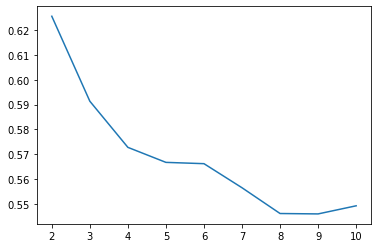

In [73]:
plt.plot(allclusters,allscore)

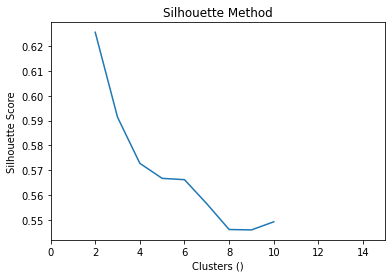

In [74]:
#Ploting the silhoutte method
plt.plot(allclusters,allscore)
plt.xlabel('Clusters ()')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [75]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred2=model.fit_predict(b)
            sum_of_squared_distances.append(model.inertia_)
            score=silhouette_score(b,pred2)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(9)

Number of cluster 2, silhouette 0.6255735825522448
Number of cluster 3, silhouette 0.5913641703825016
Number of cluster 4, silhouette 0.5727903963429656
Number of cluster 5, silhouette 0.5666993447610628
Number of cluster 6, silhouette 0.5662217705489769
Number of cluster 7, silhouette 0.5565251663445836
Number of cluster 8, silhouette 0.5461575730884706
Number of cluster 9, silhouette 0.5462647285746417


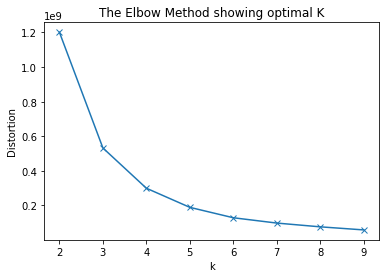

In [76]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()